In [1]:
import pandas as pd
import numpy as np
import os
import scipy
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

print(os.getcwd())

C:\Users\rjourney\Desktop\Jupyter Drills\Thinkful DRILLS


In [22]:
fname = "Military Deaths by Cause 1980-2010.csv"
df = pd.read_csv(fname)

df

,Calendar Year,Active Duty,Full-Time (est) Guard+Reserve,Selected Reserve FTE,Total Military FTE,Total Deaths,Accident,Hostile Action,Homicide,Illness,Pending,Self-Inflicted,Terrorist Attack,Undetermined,Deaths % of Total FTE,% of Deaths Accident,% of Deaths Hostile Action,% of Deaths Homicide,% of Deaths Illness,% of Deaths Self-Inflicted
0,1980,2050758.0,22000.0,86872.0,2159630.0,2392.0,1556.0,0.0,174.0,419.0,0.0,231.0,1.0,11.0,0.10%,65.10%,0.00%,7.30%,17.50%,9.70%
1,1981,2093032.0,22000.0,91719.0,2206751.0,2380.0,1524.0,0.0,145.0,457.0,0.0,241.0,0.0,13.0,0.10%,64.00%,0.00%,6.10%,19.20%,10.10%
2,1982,2112609.0,41000.0,97458.0,2251067.0,2319.0,1493.0,0.0,108.0,446.0,0.0,254.0,2.0,16.0,0.10%,64.40%,0.00%,4.70%,19.20%,11.00%
3,1983,2123909.0,49000.0,100455.0,2273364.0,2465.0,1413.0,18.0,115.0,419.0,0.0,218.0,263.0,19.0,0.10%,57.30%,0.70%,4.70%,17.00%,8.80%
4,1984,2138339.0,55000.0,104583.0,2297922.0,1999.0,1293.0,1.0,84.0,374.0,0.0,225.0,6.0,16.0,0.10%,64.70%,0.10%,4.20%,18.70%,11.30%
5,1985,2150379.0,64000.0,108806.0,2323185.0,2252.0,1476.0,0.0,111.0,363.0,0.0,275.0,5.0,22.0,0.10%,65.50%,0.00%,4.90%,16.10%,12.20%
6,1986,2177845.0,69000.0,113010.0,2359855.0,1984.0,1199.0,2.0,103.0,384.0,0.0,269.0,0.0,27.0,0.10%,60.40%,0.10%,5.20%,19.40%,13.60%
7,1987,2166611.0,71000.0,115086.0,2352697.0,1983.0,1172.0,37.0,104.0,383.0,0.0,260.0,2.0,25.0,0.10%,59.10%,1.90%,5.20%,19.30%,13.10%
8,1988,2121659.0,72000.0,115836.0,2309495.0,1819.0,1080.0,0.0,90.0,321.0,0.0,285.0,17.0,26.0,0.10%,59.40%,0.00%,4.90%,17.60%,15.70%
9,1989,2112128.0,74200.0,117056.0,2303384.0,1636.0,1000.0,23.0,58.0,294.0,0.0,224.0,0.0,37.0,0.10%,61.10%,1.40%,3.50%,18.00%,13.70%


In [3]:
df.head()

,Calendar Year,Active Duty,Full-Time (est) Guard+Reserve,Selected Reserve FTE,Total Military FTE,Total Deaths,Accident,Hostile Action,Homicide,Illness,Pending,Self-Inflicted,Terrorist Attack,Undetermined,Deaths % of Total FTE,% of Deaths Accident,% of Deaths Hostile Action,% of Deaths Homicide,% of Deaths Illness,% of Deaths Self-Inflicted
0,1980,2050758.0,22000.0,86872.0,2159630.0,2392.0,1556.0,0.0,174.0,419.0,0.0,231.0,1.0,11.0,0.10%,65.10%,0.00%,7.30%,17.50%,9.70%
1,1981,2093032.0,22000.0,91719.0,2206751.0,2380.0,1524.0,0.0,145.0,457.0,0.0,241.0,0.0,13.0,0.10%,64.00%,0.00%,6.10%,19.20%,10.10%
2,1982,2112609.0,41000.0,97458.0,2251067.0,2319.0,1493.0,0.0,108.0,446.0,0.0,254.0,2.0,16.0,0.10%,64.40%,0.00%,4.70%,19.20%,11.00%
3,1983,2123909.0,49000.0,100455.0,2273364.0,2465.0,1413.0,18.0,115.0,419.0,0.0,218.0,263.0,19.0,0.10%,57.30%,0.70%,4.70%,17.00%,8.80%
4,1984,2138339.0,55000.0,104583.0,2297922.0,1999.0,1293.0,1.0,84.0,374.0,0.0,225.0,6.0,16.0,0.10%,64.70%,0.10%,4.20%,18.70%,11.30%


In [4]:
# My outcome variable is to create a training model for Self-Inflcted Miltary Deaths by year to 
# help predict future instances of Self-Inflicted Deaths by year.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

When you're done, submit a link to your work below.

__Outcome Variable__
>*Create a training model for Self-Inflcted Miltary Deaths by year to help predict future instances of Self-Inflicted Deaths by year.*

__Categorical Variable__
>*1) Active Duty Military Personnel*

>*2) Full Time & Reserve Military Personnel*

__Continous Variable__
>*1) Accidental Deaths*

>*2) Hostile Action*

>*3) Homicide*

>*4) Self Inflicted*

__Univariate & Bivariate__

In [5]:
df.columns

Index(['Calendar Year', 'Active Duty', 'Full-Time (est) Guard+Reserve',
       'Selected Reserve FTE', 'Total Military FTE', 'Total Deaths',
       'Accident ', 'Hostile Action', 'Homicide ', 'Illness ', 'Pending ',
       'Self-Inflicted', 'Terrorist Attack', 'Undetermined ',
       'Deaths % of Total FTE', '% of Deaths Accident',
       '% of Deaths Hostile Action', '% of Deaths Homicide',
       '% of Deaths Illness', '% of Deaths Self-Inflicted'],
      dtype='object')

In [18]:
(df['Total Deaths'] == 'TD')

C:\Users\rjourney\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [7]:
#Do not run

# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
df = df.loc[
    ((df['Total Deaths'] == 'TD') | (df['Total Deaths'] == 'TD')) & (df['Calendar Year'] == 6),
    ['Homicide', 'Self - Inflicted', 'Hostile Action', 'Accidental Deaths']
]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df.loc[:, 'Self - Inflicted':'Hostile Action'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df = df_jittered.add(jitter)

C:\Users\rjourney\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


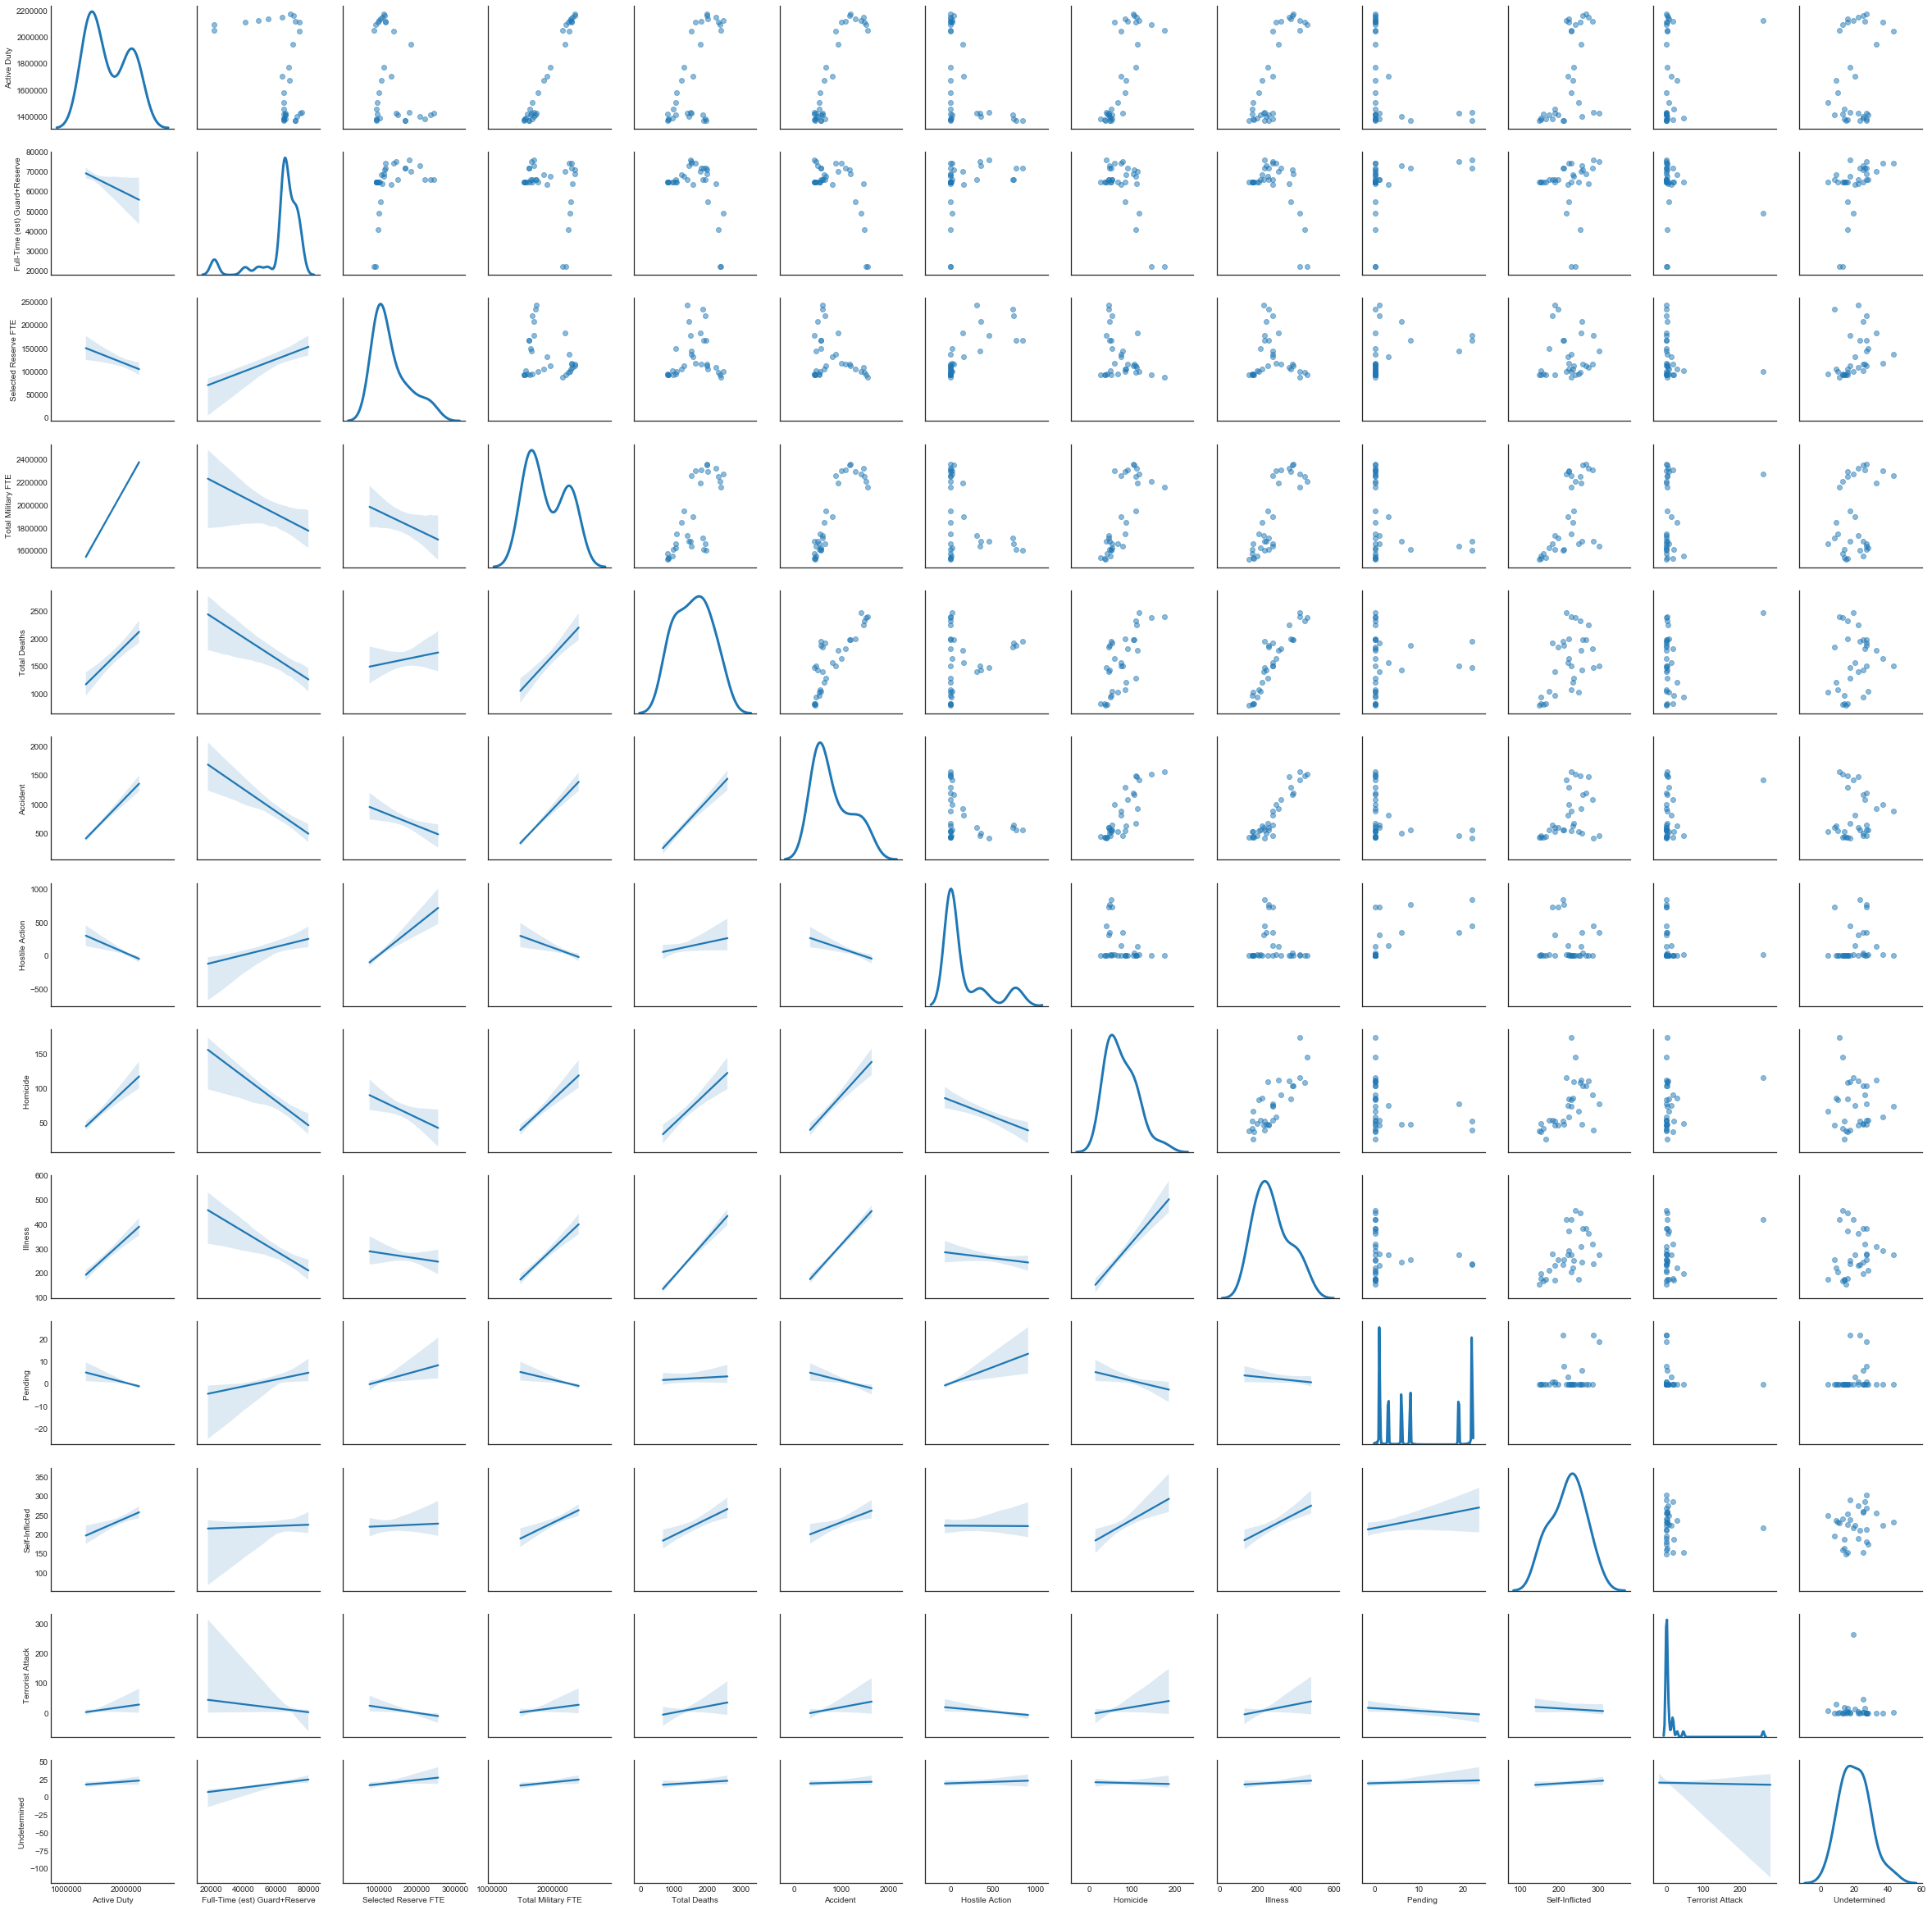

In [8]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

                               Active Duty  Full-Time (est) Guard+Reserve  \
Active Duty                       1.000000                      -0.381783   
Full-Time (est) Guard+Reserve    -0.381783                       1.000000   
Selected Reserve FTE             -0.372824                       0.383035   
Total Military FTE                0.988613                      -0.306843   
Total Deaths                      0.681947                      -0.476936   
Accident                          0.912994                      -0.649436   
Hostile Action                   -0.487332                       0.295513   
Homicide                          0.779624                      -0.665714   
Illness                           0.838092                      -0.593602   
Pending                          -0.365652                       0.314578   
Self-Inflicted                    0.530793                       0.048938   
Terrorist Attack                  0.202118                      -0.186992   

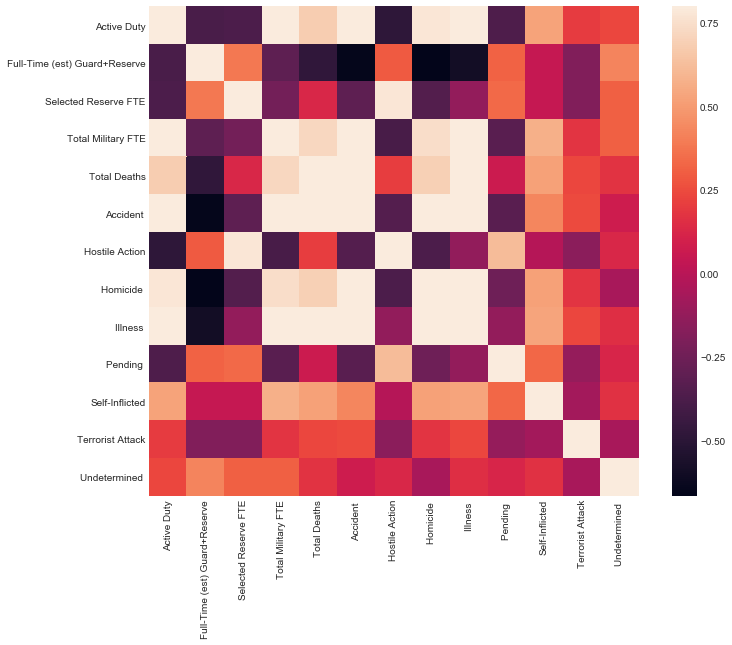

In [9]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


In [10]:
features = pd.get_dummies(df['Total Deaths'])

# Nordic countries dummy.
features['Self - Inflicted'] = np.where((df['Total Deaths'].isin(['Active Duty', 'Full-Time (est) Guard+Reserve'])), 1, 0)

print(pd.crosstab(features['Self - Inflicted'], df['Total Deaths']))

Total Deaths      796.0   817.0   827.0   832.0   943.0   974.0   1040.0  \
Self - Inflicted                                                           
0                      1       1       1       1       1       1       1   

Total Deaths      1051.0  1075.0  1213.0   ...    1929.0  1953.0  1983.0  \
Self - Inflicted                           ...                             
0                      1       1       1   ...         1       1       1   

Total Deaths      1984.0  1999.0  2252.0  2319.0  2380.0  2392.0  2465.0  
Self - Inflicted                                                          
0                      1       1       1       1       1       1       1  

[1 rows x 32 columns]


In [11]:
df["Total Deaths"] = pd.to_numeric(df['Total Deaths'],errors = "coerce")

In [12]:
df.dtypes

Calendar Year                     object
Active Duty                      float64
Full-Time (est) Guard+Reserve    float64
Selected Reserve FTE             float64
Total Military FTE               float64
Total Deaths                     float64
Accident                         float64
Hostile Action                   float64
Homicide                         float64
Illness                          float64
Pending                          float64
Self-Inflicted                   float64
Terrorist Attack                 float64
Undetermined                     float64
Deaths % of Total FTE             object
% of Deaths Accident              object
% of Deaths Hostile Action        object
% of Deaths Homicide              object
% of Deaths Illness               object
% of Deaths Self-Inflicted        object
dtype: object

In [13]:
features['Over 1500'] = np.where(df['Total Deaths']>=1500, 1, 0)
features

# Check to make sure it worked.
#print(df['Total Deaths'].groupby(features['Active Duty']).describe())

,796.0,817.0,827.0,832.0,943.0,974.0,1040.0,1051.0,1075.0,1213.0,...,1983.0,1984.0,1999.0,2252.0,2319.0,2380.0,2392.0,2465.0,Self - Inflicted,Over 1500
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


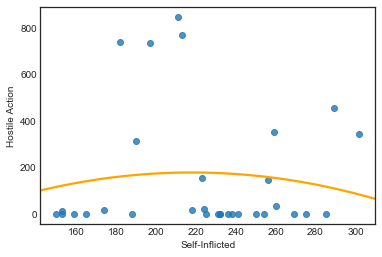

In [14]:
sns.regplot(
    df['Self-Inflicted'],
    y=df['Hostile Action'],
    y_jitter=.69,
    order=2,
    scatter_kws={'alpha':0.8},
    line_kws={'color':'orange'},
    ci=None
)
plt.show()

features['age_squared'] = df['Self-Inflicted'] * df['Self-Inflicted']

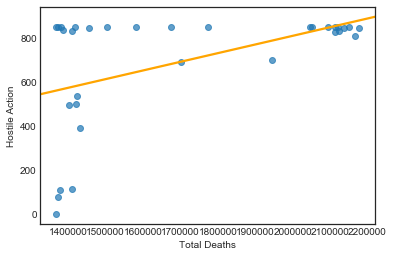

In [15]:
features['Total Deaths'] = max(df['Hostile Action']) - df['Hostile Action']

sns.regplot(
    df['Active Duty'],
    features['Total Deaths'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'orange'},
    ci=None
)
plt.xlabel('Total Deaths')
plt.ylabel('Hostile Action')
plt.show()

In [17]:
features

,796.0,817.0,827.0,832.0,943.0,974.0,1040.0,1051.0,1075.0,1213.0,...,2252.0,2319.0,2380.0,2392.0,2465.0,Self - Inflicted,Over 1500,age_squared,Total Deaths,Active Duty
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,53361.0,847.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,58081.0,847.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,64516.0,847.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,47524.0,829.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,50625.0,846.0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,75625.0,847.0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,72361.0,845.0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,67600.0,810.0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,81225.0,847.0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,50176.0,824.0,0


In [29]:
features['Active Duty'] = np.where(df['Full-Time (est) Guard+Reserve'] >= 1, 1, 0)

features['Hostile_Action_Times_Self-Inflicted'] = df['Hostile Action'] * df['Self-Inflicted']

features['Hostile_Action_Times_Self-Inflicted']

features.columns

Index([                                796.0,
                                       817.0,
                                       827.0,
                                       832.0,
                                       943.0,
                                       974.0,
                                      1040.0,
                                      1051.0,
                                      1075.0,
                                      1213.0,
                                      1293.0,
                                      1399.0,
                                      1440.0,
                                      1485.0,
                                      1507.0,
                                      1515.0,
                                      1575.0,
                                      1636.0,
                                      1787.0,
                                      1819.0,
                                      1847.0,
                                  

In [ ]:
#How do you come up with features? I cannot seem to locate many except those that are provided in the lesson

__New Features__

#Look at Feature Engineering
>*1)

>*2)

>*3)

>*4)

>*5)

>*6)

>*7)

>*8)

>*9)

>*10)

__Best Features__

#Look at Feature Selection

>*1)

>*2)

>*3)

>*4)

>*5)